# Innomatics Data Science Internship (Hackathon)

**Assume that you started working with Netfiz as a Junior Data Scientist. For your company, providing better movie recommendations is at its core and, helps improve better user experience and generate more revenue.**

### Understand that:
> Recommender systems make movie-watching a personalized adventure, delighting users with tailored suggestions based on their tastes. By predicting user preferences, these systems keep users engaged, driving increased interaction with your platform.
A robust movie recommender system translates to business success. Satisfied users are loyal users, contributing to increased user retention and revenue.
Imagine the excitement of helping users discover their next favorite movie! Later during the internship program, we will ask you to create a cutting-edge movie recommendation system based on a treasure trove of user ratings. 

**For now, your first task at Netfiz is to crunch the data given and answer all the questions asked below.**



### About Dataset: 
Dive into a dataset brimming with 100,836 ratings across 9,742 movies, generated by 610 users over the years. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. Each user is represented by an id, and no other information is provided about the user. The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.

In [11]:
# import libraries
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [12]:
## Loading the datasets
movies = pd.read_csv(r"C:\Users\RAGUWING\Desktop\Resume\Additional Documents\movie_data\movies.csv")
links = pd.read_csv(r"C:\Users\RAGUWING\Desktop\Resume\Additional Documents\movie_data\links.csv")
ratings = pd.read_csv(r"C:\Users\RAGUWING\Desktop\Resume\Additional Documents\movie_data\ratings.csv")
tags = pd.read_csv(r"C:\Users\RAGUWING\Desktop\Resume\Additional Documents\movie_data\tags.csv")

In [42]:
movies.head()
links.head()
ratings.head()
tags.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
# Data Exploration
print('shape of movies dataframe: ',movies.shape)
print('shape of links dataframe: ',links.shape)
print('shape of ratings dataframe: ',ratings.shape)
print('shape of tags dataframe: ',tags.shape)

shape of movies dataframe:  (9742, 3)
shape of links dataframe:  (9742, 3)
shape of ratings dataframe:  (100836, 4)
shape of tags dataframe:  (3683, 4)


In [14]:
print('Total Unique Ids in rating dataframe: ', ratings.nunique(), sep = '\n')

Total Unique Ids in rating dataframe: 
userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64


In [30]:
# lets see which movie has recieved most number of ratings
ratings.movieId.value_counts()[0:1]
print('*'*30)
# lets see movie id 356 belongs to which movie
movies.head()
movies[movies.movieId == 356] # forest gump has recieved the maximum number of movie ratings

356    329
Name: movieId, dtype: int64

******************************


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [37]:
'''lets merge movies and tags dataframe to get all the 
correct tags submitted by users to "Matrix, The (1999)" movie?'''
temp = movies.merge(tags,how='inner',on='movieId')
temp.head()
temp[temp.title == 'Matrix, The (1999)']

'lets merge movies and tags dataframe to get all the \ncorrect tags submitted by users to "Matrix, The (1999)" movie?'

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


In [54]:
'''Now lets merge movies and the ratings dataframes to find 
What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?'''

temp1 = movies.merge(ratings,how='inner',on='movieId')
temp1.head()

print('average movie rating of Terminator 2: Judgment Day (1991): ',
      round(temp1[temp1.title == 'Terminator 2: Judgment Day (1991)']['rating'].mean(),2))

'Now lets merge movies and the ratings dataframes to find \nWhat is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?'

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


average movie rating of Terminator 2: Judgment Day (1991):  3.97


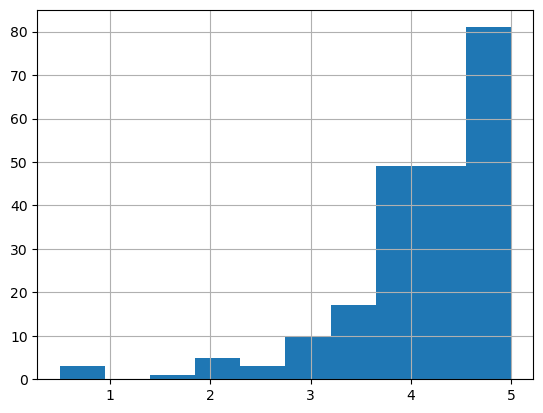

In [60]:
''' Lets now look into the data distribution of user ratings for Fight Club (1999) movie '''

temp1[temp1.title == 'Fight Club (1999)']['rating'].hist();

# The histogram shows clearly a negatively skewed distribution i.e Left skewed!
# the x-axis represent rating bins and y-axis represent the count of ratings in each bin

In [84]:
# Note1:  Mandatory Operations
# 1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
# 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
# 3. Filter only those movies which have more than 50 user ratings (i.e. > 50)

temp2 = ratings.groupby('movieId')['rating'].agg(['count','mean']).rename(
    columns={'count':'Rating_count','mean':'Average_rating'}) # step 1

print('Grouped data frame of movies and ratings')
temp2.head()

temp3 = movies.merge(temp2,how='inner',on='movieId') # step 2 
print('*'*50)
print('Look at the resultant data frame after performing the mandatory operations')
resultdf = temp3[temp3.Rating_count > 50] # step 3
resultdf

Grouped data frame of movies and ratings


,Rating_count,Average_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


**************************************************
Look at the resultant data frame after performing the mandatory operations


,movieId,title,genres,Rating_count,Average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [139]:
'''Lets see Which movie is the most popular based on  average user ratings?'''
resultdf.sort_values(by='Average_rating',ascending=False)[0:1]

#resultdf.Average_rating.max()
#resultdf[resultdf.Average_rating == 4.429022082018927]

'''
Select all the correct options which comes under 
top 5 popular movies based on number of user ratings.
'''

resultdf.sort_values(by='Rating_count',ascending=False).head()

'''
Which Sci-Fi movie is "third most popular" based on the number of user ratings?
'''

resultdf.sort_values(by = 'Rating_count',ascending=False)[0:10]

'Lets see Which movie is the most popular based on  average user ratings?'

,movieId,title,genres,Rating_count,Average_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


'\nSelect all the correct options which comes under \ntop 5 popular movies based on number of user ratings.\n'

,movieId,title,genres,Rating_count,Average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


'\nWhich Sci-Fi movie is "third most popular" based on the number of user ratings?\n'

,movieId,title,genres,Rating_count,Average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
97,110,Braveheart (1995),Action|Drama|War,237,4.031646
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
461,527,Schindler's List (1993),Drama|War,220,4.225000


In [140]:
resultdf[resultdf.title == 'Inception (2010)']

,movieId,title,genres,Rating_count,Average_rating
7355,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434


In [147]:
# Note 2: Mandatory Operations
# You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

# Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. 
# "README.md" file contains the required details.

In [149]:
pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1264 sha256=43b7916aa077cffb0c2a752ea3aebdb88664e3c3461a09e8db12498af2760c83
  Stored in directory: c:\users\raguwing\appdata\local\pip\cache\wheels\d4\c8\5b\b5be9c20e5e4503d04a6eac8a3cd5c2393505c29f02bea0960
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [150]:
import requests
import numpy as np
from bs4 import FILL_IN_THE_BLANK

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.FILL_IN_THE_BLANK(URL, headers=request_header)
    soup = FILL_IN_THE_BLANK(response.text)
    imdb_rating = soup.find('FILL_IN_THE_BLANK', attrs={'FILL_IN_THE_BLANK' : 'FILL_IN_THE_BLANK'})
    return imdb_rating.text if imdb_rating else np.nan

ImportError: cannot import name 'FILL_IN_THE_BLANK' from 'bs4' (C:\Users\RAGUWING\anaconda3\Lib\site-packages\bs4\__init__.py)

In [146]:
Movie_names = resultdf.title.to_list()
Movie = []
for i in Movie_names:
    Movie.append(re.sub(r"\(\d{4}\)", "", i))

Movie[0:10]

['Toy Story ',
 'Jumanji ',
 'Grumpier Old Men ',
 'Heat ',
 'Sabrina ',
 'GoldenEye ',
 'American President, The ',
 'Casino ',
 'Sense and Sensibility ',
 'Ace Ventura: When Nature Calls ']

In [ ]:
Movie_name = []
Movie_rating = []
for i in Movie:
    url = "https://www.imdb.com/list/ls565785761/"
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("div",class_="lister-item-header"):
        Movie_name.append(i.text)
        
    for i in soup.find_all("div",class_="mb-srp__card__price--amount"):
        price.append(i.text)